In [22]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [23]:
from google.colab import files
uploaded=files.upload()

In [24]:
img_T = cv.imread('/content/2.img.png')
image = cv.cvtColor(img_T, cv.COLOR_BGR2RGB)

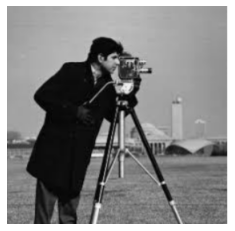

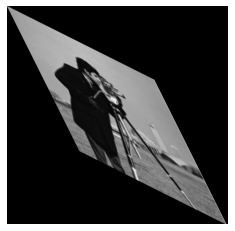

In [25]:
#@title ARITHMETIC {run:'auto'}

Transformation = "Shearing" #@param["Translation","Scaling","Shearing","Reflection","Rotation"]

if Transformation == "Scaling":
    print(image.shape)
    #rows, cols, dim = image.shape
    #print(rows)

    # disable x & y axis
    plt.axis('off')
    # show the image
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    #transformation matrix for Scaling
    M = np.float32([[2, 0  , 0],
                  [0,   2, 0],
                  [0,   0,   1]])
    # apply a perspective transformation to the image
    scaled_img = cv.warpPerspective(image,M,(cols*2,rows*2))
    # disable x & y axis
    #plt.axis('off')
    # show the resulting image
    cv2_imshow(scaled_img)
    #plt.imshow(scaled_img)
    print(scaled_img.shape)
    #plt.show()
    # save the resulting image to disk
    plt.imsave("fruits_scaled.jpg", scaled_img)


if Transformation == "Shearing":
    plt.axis('off')
    # show the image
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    # transformation matrix for Shearing
    # shearing applied to x-axis
    M1 = np.float32([[1, 0.5, 0],
                  [0.5, 1  , 0],
                  [0, 0  , 1]])

    # apply a perspective transformation to the image                
    sheared_imgx = cv.warpPerspective(image,M1,(int(cols*1.5),int(rows*1.5)))
    #sheared_imgy = cv.warpPerspective(image,M2,(int(cols*1.5),int(rows*1.5)))

    # disable x & y axis
    plt.axis('off')
    # show the resulting image
    
    plt.imshow(sheared_imgx)
    plt.show()
    # save the resulting image to disk
    plt.imsave("cameramen_sheared.jpg", sheared_img)

if Transformation == "Reflection":
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    # transformation matrix for x-axis reflection 
    M = np.float32([[1,  0, 0   ],
                    [0, -1, rows],
                    [0,  0, 1   ]])

    # apply a perspective transformation to the image
    reflected_img = cv.warpPerspective(image,M,(int(cols),int(rows)))
    # disable x & y axis
    #plt.axis('off')
    # show the resulting image
    plt.imshow(reflected_img)
    plt.show()


if Transformation == "Rotation":
    rotation_angle =  20#@param{type: "number"}
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    #angle from degree to radian
    angle = np.radians(rotation_angle)
    #transformation matrix for Rotation
    M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
                  [np.sin(angle), np.cos(angle), 0],
                  [0, 0, 1]])
    # apply a perspective transformation to the image
    rotated_img = cv.warpPerspective(image, M, (int(cols),int(rows)))
    # disable x & y axis
    #plt.axis('off')
    # show the resulting image
    plt.imshow(rotated_img)
    plt.show()
    # save the resulting image to disk
    plt.imsave("leena_rotated.jpg", rotated_img)
if Transformation == "Translation":
    # The image moves down, up, right, left
    M = np.float32([[1, 0, 20], [0, 1, 100], [0, 0, 1]])
    img1 = cv.warpPerspective(image, M, (image.shape[1]*2, image.shape[0]*2))

    M = np.float32([[1, 0, 20], [0, 1, -100], [0, 0, 1]])
    img2 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    M = np.float32([[1, 0, 100], [0, 1, 20], [0, 0, 1]])
    img3 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    M = np.float32([[1, 0, -100], [0, 1, 20], [0, 0, 1]])
    img4 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    # Display graphics
    titles = ['Orig', 'down', 'up', 'To the right', 'left']
    images = [image, img1, img2, img3, img4]
    for i in range(1,6):            
        plt.subplot(2, 3, i )  
        
        plt.imshow(images[i-1])          
        plt.title(titles[i-1])
        plt.xticks([100]), plt.yticks([100])
    plt.show()


  #@markdown Image is shown below

In [26]:
!pip install streamlit

     |████████████████████████████████| 788kB 29.1MB/s 
     |████████████████████████████████| 368kB 32.0MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [27]:
!pip install pyngrok

In [28]:
!ngrok authtoken 1utHudl6HJskBWASmlDSSYZo42K_665jAW2DbvMGGmbgAgi8Z

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [29]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
from keras.models import load_model

html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Digital Image Processing lab</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Collor Palette
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))
R = st.slider('R', min_value=0, max_value=255, step=1)
G = st.slider('G', min_value=0, max_value=255, step=1)
B = st.slider('B', min_value=0, max_value=255, step=1)

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  #img = image.load_img(image_data, target_size=(224, 224))
  #image = image.img_to_array(img)
  #img_reshap= np.expand_dims(image, axis=0)
  #img_reshap = preprocess_input(img_reshap)
   
  image_data[:] = [R,G,B]
  st.image(image_data, use_column_width=True)
  return 0
if file is None:
  st.text("Please upload an Image file")
else:
  file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  image = cv2.imdecode(file_bytes, 1)
  st.image(file,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Change Color"):
  result=import_and_predict(image)
  
if st.button("About"):
  st.header(" Alka Rani")
  st.subheader("Assistant Professor, Department of Computer Engineering")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Digital Image processing Experiment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [30]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [31]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://b1e45b2ccca8.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2021-07-05 10:27:40.609714: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.86.112.8:80

"http://localhost:80"
http://b1e45b2ccca8.ngrok.io
./ngrok authtoken 1utHudl6HJskBWASmlDSSYZo42K_665jAW2DbvMGGmbgAgi8Z


In [ ]:
def main():
    img = cv2.imread("/content/img1.png", 1)
    #img = cv2.imread("/content/peppers_gray.tif", 1)
    #img = cv2.imread("/content/cameraman.jpg", 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    k1 = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]), np.float32)
    
    print(k1)
    print(type(k1))

    output = cv2.filter2D(img, -1, k1)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(output)
    plt.title('Sharpen Edges')
    
    plt.show()

if _name_ == "_main_":
    main()